In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
import joblib

In [21]:
df = pd.DataFrame()

In [23]:
gameCSV = "gamesales.csv"

In [25]:
df = pd.read_csv(gameCSV, delimiter=";") 

In [27]:
df['Unique_ID'] = df['Name'] + '_' + df['Year'].astype(str) + '_' + df['Publisher'] + '_' + df['Platform']

In [29]:
print(df['Unique_ID'])

0                           Wii Sports_2006.0_Nintendo_Wii
1                    Super Mario Bros._1985.0_Nintendo_NES
2                       Mario Kart Wii_2008.0_Nintendo_Wii
3                    Wii Sports Resort_2009.0_Nintendo_Wii
4              Pokemon Red/Pokemon Blue_1996.0_Nintendo_GB
                               ...                        
16593    Woody Woodpecker in Crazy Castle 5_2002.0_Kemc...
16594    Men in Black II: Alien Escape_2003.0_Infograme...
16595    SCORE International Baja 1000: The Official Ga...
16596                        Know How 2_2010.0_7G//AMES_DS
16597                  Spirits & Spells_2003.0_Wanadoo_GBA
Name: Unique_ID, Length: 16598, dtype: object


In [31]:
df.head(20)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Unique_ID
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Wii Sports_2006.0_Nintendo_Wii
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Super Mario Bros._1985.0_Nintendo_NES
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Mario Kart Wii_2008.0_Nintendo_Wii
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Wii Sports Resort_2009.0_Nintendo_Wii
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Pokemon Red/Pokemon Blue_1996.0_Nintendo_GB
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,Tetris_1989.0_Nintendo_GB
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,New Super Mario Bros._2006.0_Nintendo_DS
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,Wii Play_2006.0_Nintendo_Wii
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,New Super Mario Bros. Wii_2009.0_Nintendo_Wii
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,Duck Hunt_1984.0_Nintendo_NES


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
 11  Unique_ID     16540 non-null  object 
dtypes: float64(6), int64(1), object(5)
memory usage: 1.5+ MB


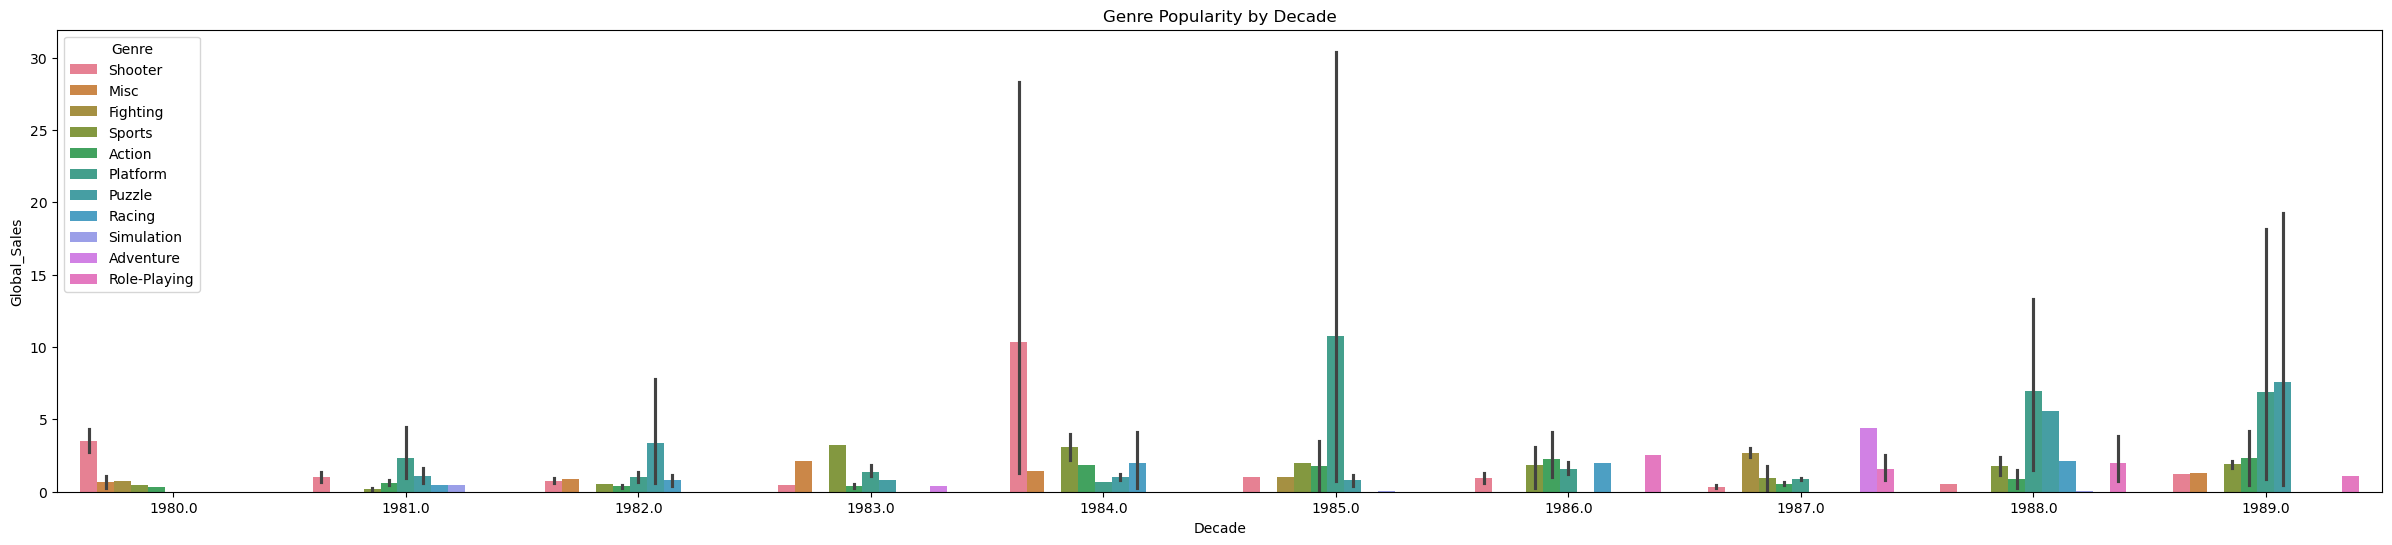

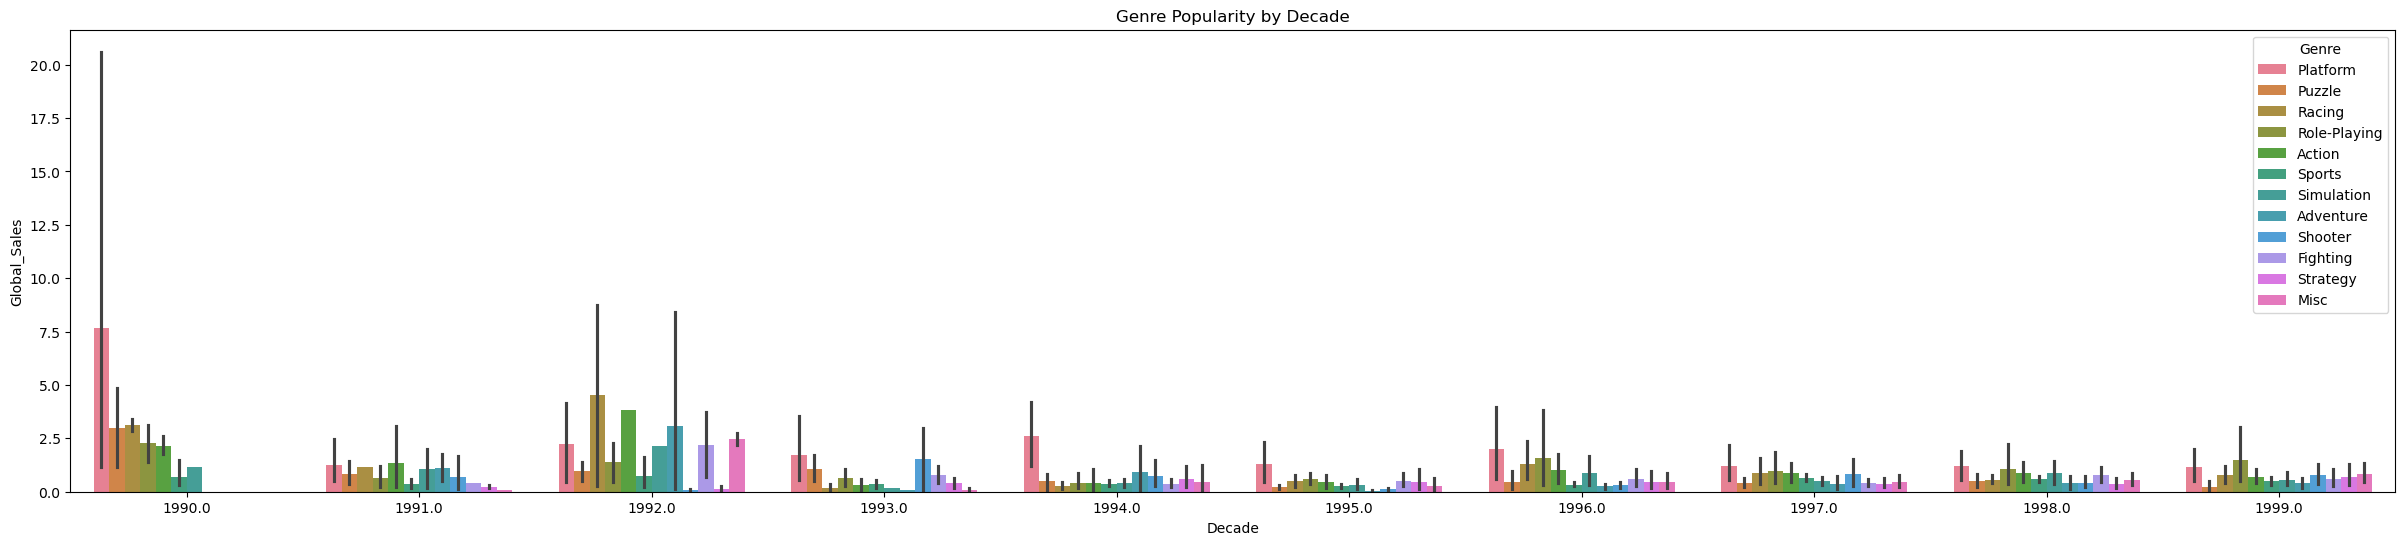

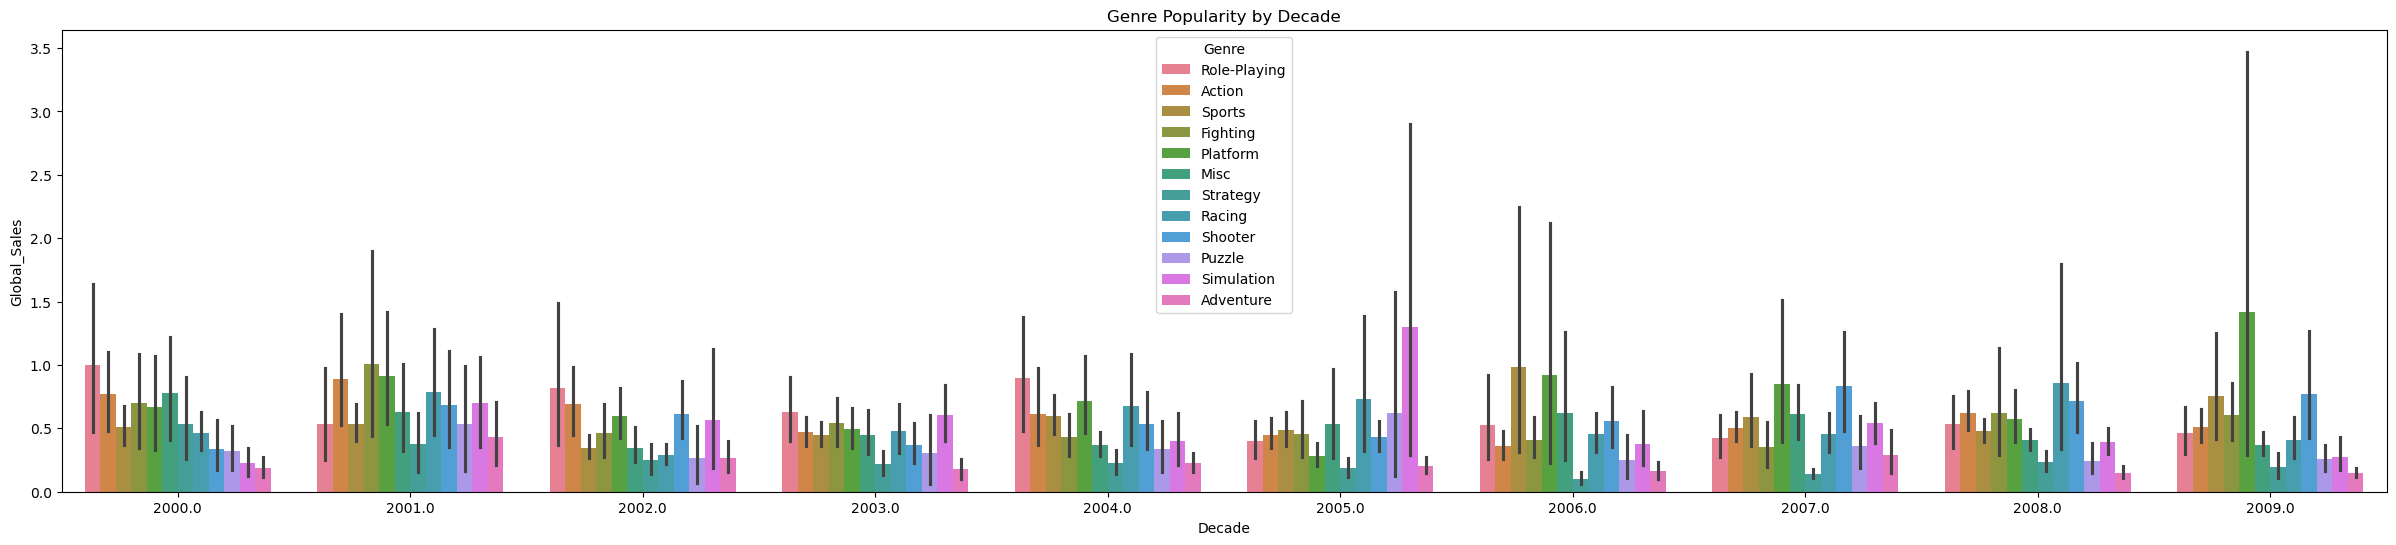

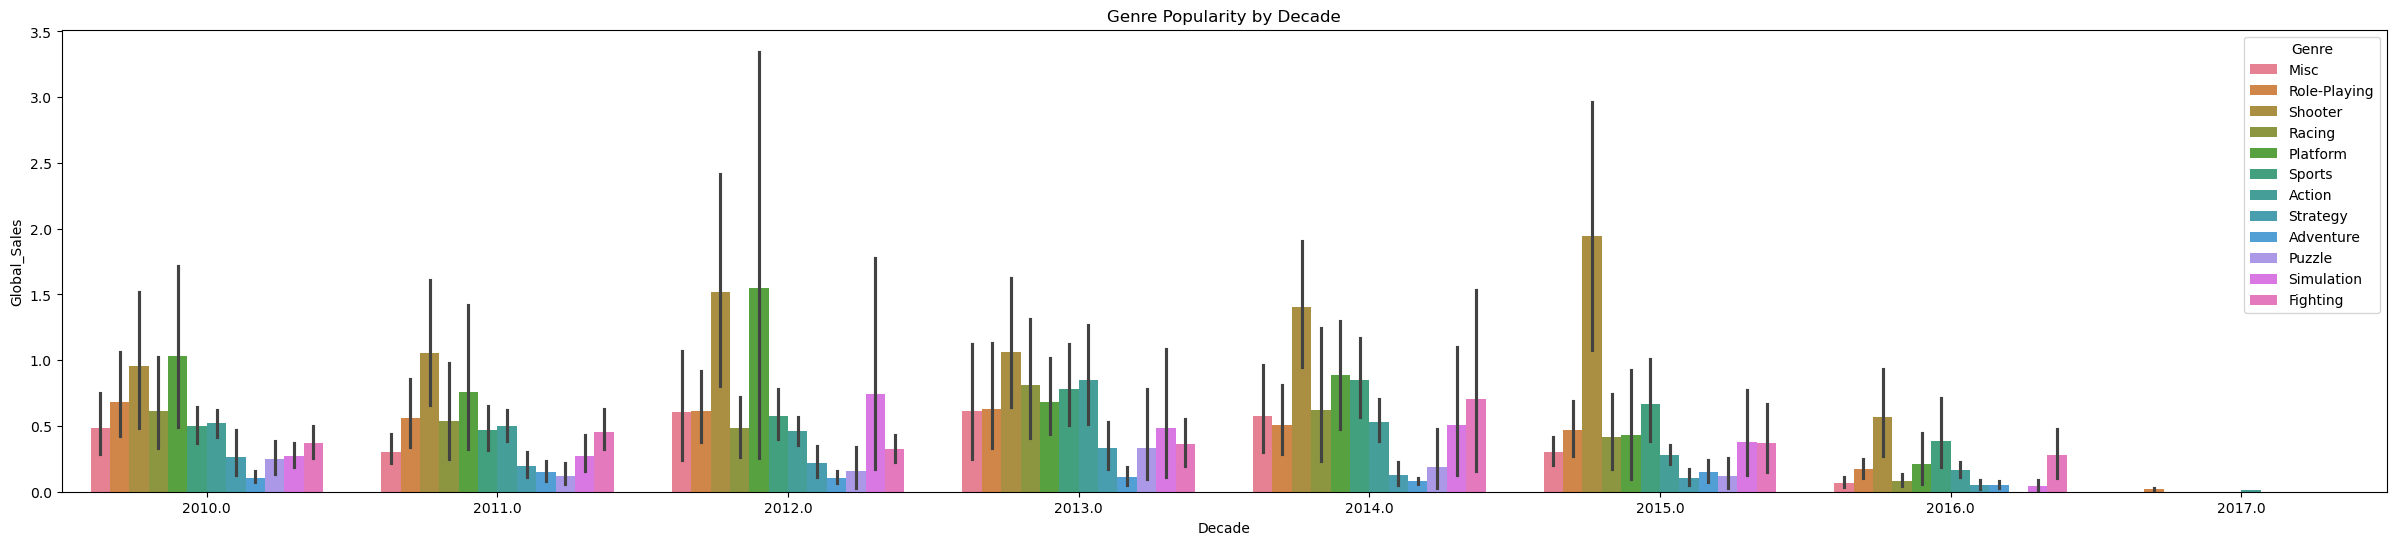

In [35]:
df_1980s = df[df['Year'].between(1980, 1989)]
df_1990s = df[df['Year'].between(1990, 1999)]
df_2000s = df[df['Year'].between(2000, 2009)]
df_2010s = df[df['Year'].between(2010, 2019)]
# 1980s
plt.figure(figsize=(30, 6))
sns.barplot(data=df_1980s, x="Year", y="Global_Sales", hue="Genre")
plt.title("Genre Popularity by Decade")
plt.xlabel("Decade")
plt.show()
# 1990s
plt.figure(figsize=(30, 6))
sns.barplot(data=df_1990s, x="Year", y="Global_Sales", hue="Genre")
plt.title("Genre Popularity by Decade")
plt.xlabel("Decade")
plt.show()
# 2000s
plt.figure(figsize=(30, 6))
sns.barplot(data=df_2000s, x="Year", y="Global_Sales", hue="Genre")
plt.title("Genre Popularity by Decade")
plt.xlabel("Decade")
plt.show()
# 2010
plt.figure(figsize=(30, 6))
sns.barplot(data=df_2010s, x="Year", y="Global_Sales", hue="Genre")
plt.title("Genre Popularity by Decade")
plt.xlabel("Decade")
plt.show()

In [36]:
# Nur relevante Spalten auswählen: Publisher, Genre, Year, Platform und Global_Sales
df_relevant = df[['Publisher', 'Genre', 'Year', 'Platform', 'Global_Sales']]

df_relevant = df_relevant.dropna(subset=['Publisher', 'Genre', 'Year', 'Platform', 'Global_Sales'])


In [37]:
non_numeric_columns = df.select_dtypes(include=['object']).columns

In [38]:

df_cleaned = df.drop(columns=non_numeric_columns)

In [39]:
df_cleaned = df_cleaned.fillna(df_cleaned.mean())

In [40]:

X = df_cleaned.drop(columns=['Global_Sales']) 
y = df_cleaned['Global_Sales'] 

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [43]:
y_pred = model.predict(X_test)

In [44]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 2.7250053001841497e-05
Root Mean Squared Error: 0.005220158331108502


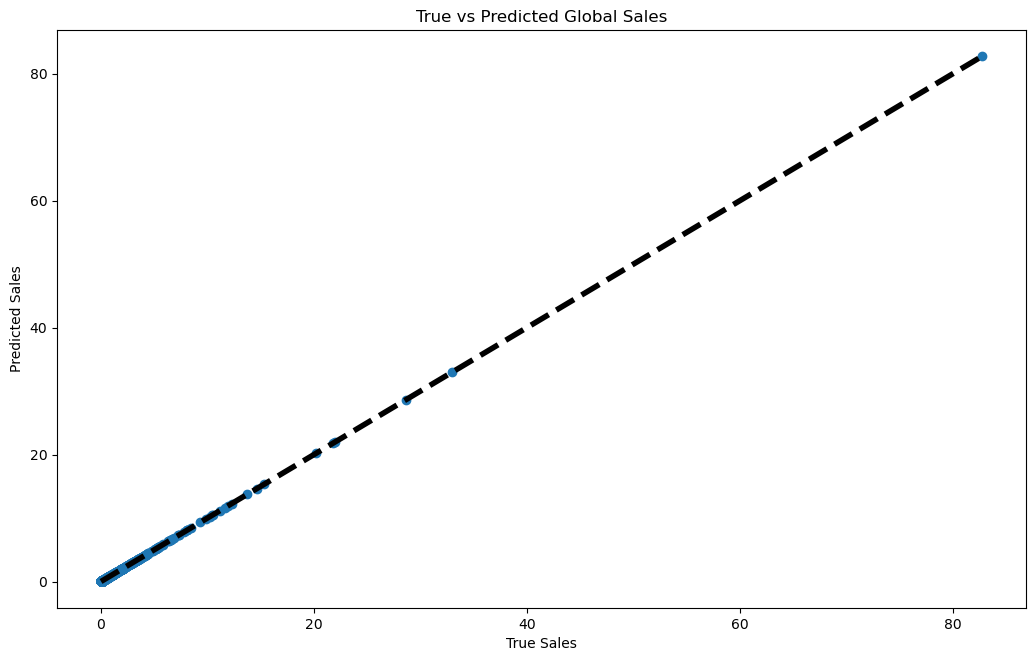

In [55]:
plt.figure(figsize=(12.5, 7.5))
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('True Sales')
plt.ylabel('Predicted Sales')
plt.title('True vs Predicted Global Sales')
plt.show()